In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [15]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
# Split the data into features and target
X = data.drop(columns=['target'])
y = data['target']



In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [19]:
# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)



In [20]:
# Convert back to DataFrame for easier manipulation
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X.columns))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X.columns))



In [21]:
# Apply PCA to the polynomial features
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_poly_df)
X_test_pca = pca.transform(X_test_poly_df)



In [22]:
# Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_poly_df, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]



In [23]:
# Get the feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out(X.columns)



In [24]:
# Select the top 10 features
top_features = [feature_names[i] for i in indices[:10]]
X_train_top = X_train_poly_df[top_features]
X_test_top = X_test_poly_df[top_features]



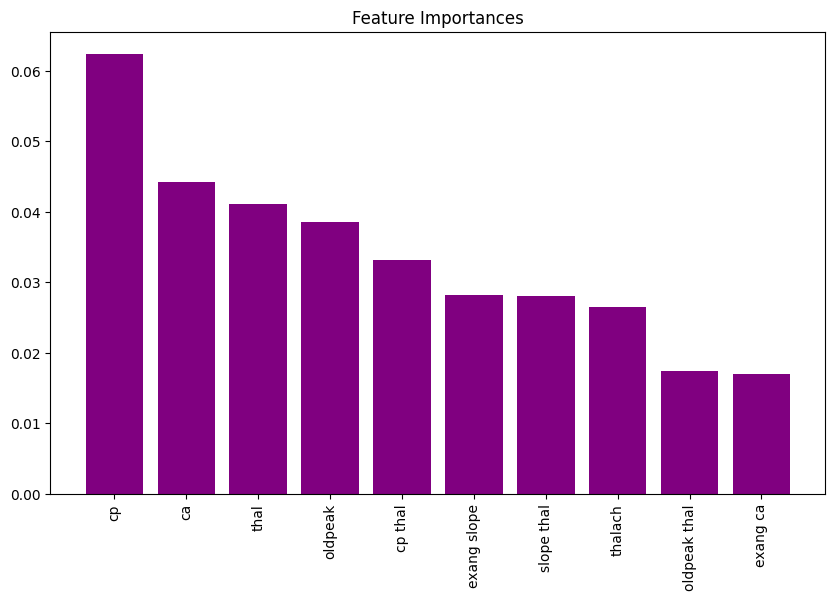

In [34]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(top_features)), importances[indices][:10], align="center",color='purple')
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.show()



In [26]:
# Display the top features
print("Top features:", top_features)



Top features: ['cp', 'ca', 'thal', 'oldpeak', 'cp thal', 'exang slope', 'slope thal', 'thalach', 'oldpeak thal', 'exang ca']


In [27]:
# Compare model performance with different feature sets

# Model with original features
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print("Accuracy with original features:", accuracy_score(y_test, y_pred))



Accuracy with original features: 0.9853658536585366


In [28]:
# Model with polynomial features and PCA
rf.fit(X_train_pca, y_train)
y_pred_pca = rf.predict(X_test_pca)
print("Accuracy with polynomial features and PCA:", accuracy_score(y_test, y_pred_pca))



Accuracy with polynomial features and PCA: 0.9707317073170731


In [29]:
# Model with top features
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)
rf.fit(X_train_top_scaled, y_train)
y_pred_top = rf.predict(X_test_top_scaled)
print("Accuracy with top features:", accuracy_score(y_test, y_pred_top))



Accuracy with top features: 0.9707317073170731


In [30]:
# Save the models if needed
import joblib
joblib.dump(rf, 'random_forest_model.pkl')



['random_forest_model.pkl']

In [31]:
# Save the transformed datasets if needed
X_train_poly_df.to_csv('X_train_poly.csv', index=False)
X_test_poly_df.to_csv('X_test_poly.csv', index=False)